# Ground State Silicon

### Muffin Tin Radius Determination

In [9]:
import os

import numpy as np

al = 10.2612128567   # In Bohr
bond_length = np.sqrt(3) * 0.25 * al

# MT radius: Start with 1/2 bond length. Touching spheres corresponds to scaling = 1.0
scaling = 0.9
radius_mt_max = scaling * 0.5 * bond_length

print(bond_length)
print(radius_mt_max)

4.443235503770845
1.9994559766968802


### Initial Input and Basis with Reasonable Settings

**input.xml**
```
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.00">
        <atom coord="0.00 0.00 0.00"></atom>
	    <atom coord="0.25 0.25 0.25"></atom>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="6.0"            # Reasonable
      ngridk="8 8 8"          # Converged
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="20.0"
      lorecommendation="false"
      >
   </groundstate>

   <properties>
    <chargedensityplot>
    <plot1d>
    <path steps="100">
               <point coord="0.00 0.00 0.00"/>
               <point coord="0.25 0.25 0.25"/>
    </path>
    </plot1d>
    </chargedensityplot>
   </properties>

</input>
```

**Si.xml**
* rtmin starts closer to the nucleus, and the mesh points is dense.

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
    <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>
      <custom l="0" type="apw+lo" trialEnergy="0.1500" searchE="true"/>
      <custom l="1" type="apw+lo" trialEnergy="0.1500" searchE="true"/>
    </basis>
  </sp>
</spdb>
```


/Users/alexanderbuccheri/Python/pycharm_projects/wp_benchmarks/groundstate
Radial position where the charge density is a minimum: 2.199177169 bohr


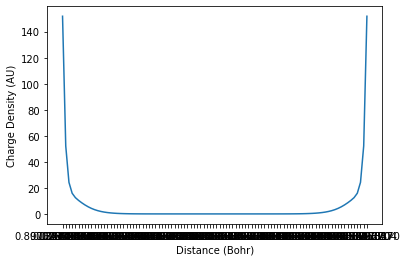

In [11]:
### Point at Which 1D Charge Density is a Minimum

import matplotlib.pyplot as plt
from src.parsers import extract_charge_density

x, y = extract_charge_density('silicon/RHO1D.xml')
index = np.argmin(y)

print(f"Radial position where the charge density is a minimum: {x[index]} bohr")

plt.xlabel("Distance (Bohr)")
plt.ylabel("Charge Density (AU)")
# Ignore close to the atoms as the density is so large
plt.plot(x[2:-2], y[2:-2])
plt.show()

Radial position where the charge density is a minimum: 2.199 bohr
This suggests that my initial guess of 1.99 Bohr can be increased to 2.199 Bohr, which is close to nearly-touching spheres (0.5 * bond length = 2.22 Bohr).

### Get an Optimal Default (ground state) Basis

* Use the optimal MT radius of 2.199 Bohr
* rgkmax is reasonable
* Added a bunch of lapws to the basis, allow them to search, and extract optimal energies from LINENGY.OUT

**input.xml**
```
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.199">
        <atom coord="0.00 0.00 0.00"></atom>
	    <atom coord="0.25 0.25 0.25"></atom>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="6.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="20.0"
      lorecommendation="false"
      >
   </groundstate>

   <properties>
    <chargedensityplot>
    <plot1d>
    <path steps="100">
               <point coord="0.00 0.00 0.00"/>
               <point coord="0.25 0.25 0.25"/>
    </path>
    </plot1d>
    </chargedensityplot>
   </properties>

</input>
```

**Si.xml**
THE INITIAL BASIS I USED

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.5" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="-0.5" searchE="true"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.5" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="-0.5" searchE="true"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="0.1" searchE="true"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="0.1" searchE="true"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="4" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="4">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="4">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="5" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="5">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="5">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

  </basis>
  </sp>
</spdb>
```

* THIS IS THE OPTIMAL BASIS I Defined according to LINENERGY VALUES

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="0.1975000000" searchE="false"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="4" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="4">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="4">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="5" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="5">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="5">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

    </basis>
  </sp>
</spdb>
```

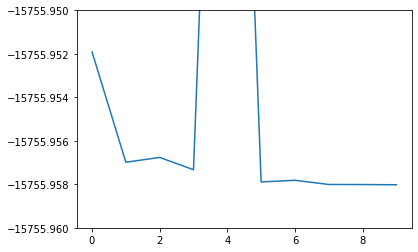

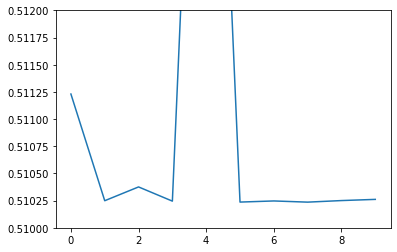

In [9]:
# NOTE! I used converged inputs to do this. FLAG THIS UPPPP

input ="""
   <groundstate
      do="fromscratch"
      rgkmax="10.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="30.0"
      lorecommendation="false"
      >
   </groundstate>

"""

import matplotlib.pyplot as plt
import numpy as np
# Check convergence as I add each LO to the LAPW channels for a) the GAP and b) the total energy.
# Remove the LAPWs as well.
ha_to_ev = 27.2114

plt.rcParams['axes.formatter.useoffset'] = False

#  Max LO (and APW)
labels = ['l=0(0,1)', 'l=0(1,2)', 'l=1(0,1)', 'l=1(1,2)', 'l=2(0,1)', 'l=2(1,2)', 'l=3(0,1)', 'l=3(1,2)', 'l=4(0,1)', 'l=4(1,2)']
est_fundamental_gap = [0.01878736, 0.01875130, 0.01875596, 0.01875116, 0.01901496, 0.01875084, 0.01875122, 0.01875082, 0.01875135, 0.01875175]
total_energy = [-579.02026038, -579.02044677, -579.02043863, -579.02045937, -579.01895492, -579.02047999, -579.02047729, -579.02048432, -579.02048446, -579.02048482]
indices = np.arange(0, len(total_energy))
plt.ylim(-15755.96, -15755.95)
plt.plot(indices, [x * ha_to_ev for x in total_energy])
plt.show()
plt.ylim(0.510, 0.512)
plt.plot(indices, [x * ha_to_ev for x in est_fundamental_gap])
plt.show()

## Optimal Basis W.r.t. LAPW+LOs

Ignoring that weird spike when I add the:

```
      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>
```



```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="0.1975000000" searchE="false"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

    </basis>
  </sp>
</spdb>
```

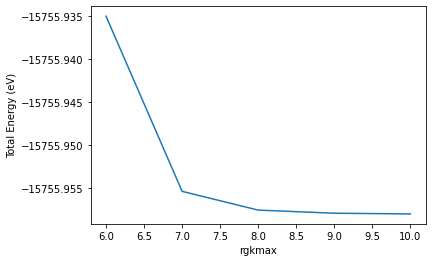

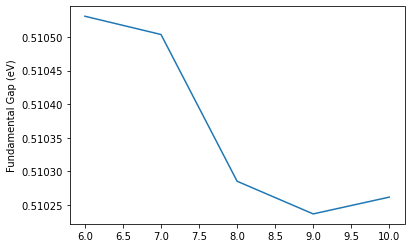

In [12]:
import matplotlib.pyplot as plt
# Converge total energy and the gap w.r.t. rgkmax
ha_to_ev = 27.2114

gmaxvr = [30., 30., 30., 30., 30.]
rgkmax = [6, 7, 8, 9, 10]
est_fundamental_gap = [0.01876166, 0.01876066, 0.01875262, 0.01875083, 0.01875175]
total_energy = [-579.01964075, -579.02038853, -579.02046855, -579.02048184, -579.02048482]

plt.xlabel("rgkmax")
plt.ylabel("Total Energy (eV)")
plt.plot(rgkmax, [x * ha_to_ev for x in total_energy])
plt.show()

plt.ylabel("Fundamental Gap (eV)")
plt.plot(rgkmax, [x * ha_to_ev for x in est_fundamental_gap])
plt.show()

details = """
0.44 eV difference in the total energy between rgkmax = 8 and 10.
Less than 0.05 meV difference in the fundamental gap between rgkmax = 8 and 10.
"""
print(details)

# Reduce gmaxvr from 30 to 24 for rgkmax = 8 gives -579.02046855 and 0.01875262
# Number is identical, so stick with 24

# Final Input

```xml
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.199">
        <atom coord="0.00 0.00 0.00"/>
	    <atom coord="0.25 0.25 0.25"/>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="8.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="24.0"
      lorecommendation="false"
      >
   </groundstate>

</input>
```

# Band structure

In [1]:
# Use ASE to get the High symmetry points and drop them into exciting band path format.
from typing import Tuple, Optional, List
import numpy as np

import ase

def get_standardised_band_path(lattice_vectors) -> Tuple[np.ndarray, dict]:
    """ ASE standardised band path and a fixed k-grid sampling the path.

    Notes:
      Check out band_path.plot()

    :param lattice_vectors: Lattice vectors stored row wise np array or as [a, b, c]
    :return: Tuple of the band path and high symmetry points {symbol: k_point/s}
    """
    cell = ase.atoms.Cell(lattice_vectors)
    band_path: ase.dft.kpoints.BandPath = cell.bandpath()
    #band_path.kpts
    return band_path.path, band_path.special_points


def find_discontinuities(path: list) -> List[bool]:
    """ Find and return high-symmetry points that end in a discontinuous band path

    For example:
       WLK,UX
    would return the mask [False, False, True, False, False, False],
    indicating that K is the end of a continuous path.

    :return: List of
    """
    mask = [False] * len(path)
    indices = [i-1 for i, value in enumerate(path) if value == ","]
    for i in indices:
        mask[i] = True
    return indices


def exciting_band_path_xml(symbolic_path, high_symmetry_points, steps:Optional[int]=100):
    """ XML-formatted band structure path for exciting.

      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/>
            </path>
         </plot1d>
      </bandstructure>

    :param symbolic_path:
    :param high_symmetry_points:
    :param steps:
    :return:
    """
    string = f"""<bandstructure>
    <plot1d>
      <path steps="{int(steps)}">\n"""

    indent = ' ' * 8

    # Identify which high symmetry points are followed by a discontinuity in the band path
    indices = [i-1 for i, value in enumerate(symbolic_path) if value == ","]
    break_point_str = [''] * len(symbolic_path)
    for i in indices:
        break_point_str[i] = 'breakafter="true"'

    # Iterate over high-symmetry points
    for i, symbol in enumerate(symbolic_path):
        if symbol == ',': continue
        point_str = " ".join(str(x) for x in high_symmetry_points[symbol]).strip()
        line = f'<point coord="{point_str}" label="{symbol}" {break_point_str[i]}/>'
        string += indent + line + '\n'

    string += """     </path>
   </plot1d>
</bandstructure>
    """

    return string


al_angstrom = 5.43
lattice = al_angstrom * np.array([[0.0, 0.5, 0.5],
                                  [0.5, 0.0, 0.5],
                                  [0.5, 0.5, 0.0]])

symbolic_path, high_symmetry_points = get_standardised_band_path(lattice)
print(symbolic_path)
band_string = exciting_band_path_xml(symbolic_path, high_symmetry_points)
print(band_string)

# None of these fucking formats can be plotted out of the raw file
# bandstructure.xml
# """
# This is arranged down the page Each block is one band, for all k-points
# Write something that parses the XML blocks
# band_energies[ik, ib]
# Need to collate each part of the path
#     G-X
#     X-W
#     ...
#     K,U
#     If the symbol is , rather than -, then the displacement vector magnitude is 0.
# Write something that plots this.
# """


# lat = HEX(a=2.512, c=7.707)
# cell = lat.tocell()
# path = cell.bandpath(npoints=100)
# path.plot()
# bs = path.free_electron_band_structure()
# bs.plot(show=True)

GXWKGLUWLK,UX
<bandstructure>
    <plot1d>
      <path steps="100">
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.5 0.0 0.5" label="X" />
        <point coord="0.5 0.25 0.75" label="W" />
        <point coord="0.375 0.375 0.75" label="K" />
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.5 0.5 0.5" label="L" />
        <point coord="0.625 0.25 0.625" label="U" />
        <point coord="0.5 0.25 0.75" label="W" />
        <point coord="0.5 0.5 0.5" label="L" />
        <point coord="0.375 0.375 0.75" label="K" breakafter="true"/>
        <point coord="0.625 0.25 0.625" label="U" />
        <point coord="0.5 0.0 0.5" label="X" />
     </path>
   </plot1d>
</bandstructure>
    


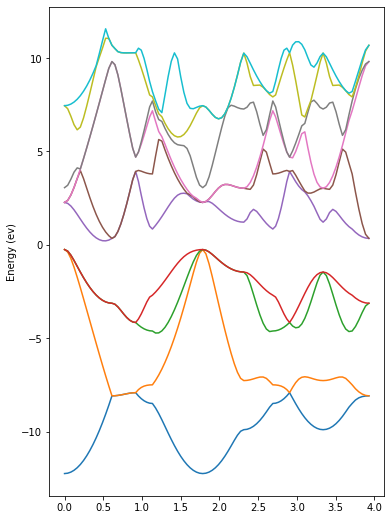

In [45]:
# Silicon band structure
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from typing import Tuple

# TODO(Alex) Resolve:
# Gives me problems when uing as an import - need to look into a clean way to debug modules
# called from Jupyter
# from src.parsers import parse_bandstructure_xml

def parse_bandstructure_xml(file_name: str) -> Tuple[np.ndarray, np.ndarray]:
    """ Parse bandstructure.xml, in Hartree

    TODO(Alex) Write a test
              Could extend to parse the vertices, if desired

    :param file_name: bandstructure.xml prepended by path.
    :return: Tuple of discrete set of points sampling the k-path, and band energies
    of .shape = (n_kpts, n_bands).
    """
    tree = ET.parse(file_name)
    root = tree.getroot()

    # Split bands and vertices
    elements = list(root)
    # title = elements[0].text
    bs_xml = {'band': [], 'vertex': []}
    for item in elements[1:]:
        bs_xml[item.tag].append(item)

    n_bands = len(bs_xml['band'])
    first_band = bs_xml['band'][0]
    n_kpts = len(list(first_band))

    # Same set of flattened k-points, per band - so parse once
    k_vector = np.empty(shape=n_kpts)
    for ik, point in enumerate(list(first_band)):
        k_vector[ik] = point.get('distance')

    # Useful to note - then remove
    # print(point.tag, point.items(), point.keys(), point.get('distance'))

    # Read E(k), per band
    band_energies = np.empty(shape=(n_kpts, n_bands))
    for ib, band in enumerate(bs_xml['band']):
        points = list(band)
        for ik, point in enumerate(points):
            band_energies[ik, ib] = point.get('eval')

    return k_vector, band_energies

# Plot
ha_to_ev = 27.2114
k_points, band_energies = parse_bandstructure_xml("bandstructure.xml")
fig, ax = plt.subplots(figsize=(6, 9))
n_bands = band_energies.shape[1]
plt.ylabel('Energy (ev)')

# TODO(Alex) Add the band path symbols
# high_sym_indices, high_sym_symbols = xticks_and_xticklabels(k_points, high_sym_points)
# ax.set_xticks(k[high_sym_indices])
# ax.set_xticklabels(high_sym_symbols)

for ib in range(0, n_bands):
    plt.plot(k_points, ha_to_ev * band_energies[:, ib])
